# NetworkX Tutorial 

Exploring and Analyzing Network Data with Python：https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

NetworkX Documentation：https://networkx.org/documentation/stable/tutorial.html#adding-attributes-to-graphs-nodes-and-edges

社會網絡分析(3-1)：https://medium.com/數學-人工智慧與蟒蛇/社會網絡分析-3-1-基於圖理論的網絡表達及分析方法-632a11a1e2a7

In [35]:
import csv
import math
import numpy as np
import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import community as community_louvain

Recent scholars have progressed from a largely qualitative and metaphoric interest in links and connections to a more formal suite of quantitative tools for studying mediators, hubs (important nodes), and inter-connected structures. 
As sociologist Mark Granovetter pointed out in his important 1973 article **“The Strength of Weak Ties”** it’s rarely enough to notice that two people were connected with one another. Factors such as their structural relation to further people and whether those additional people were themselves connected to one another have decisive influence on events. Insofar as even the most perceptive of scholars has difficulty perceiving, say, the overall shape of a network (its network “topology”) and identifying the nodes most significant for connecting groups, quantitative network analysis offers scholars a way to move relatively fluidly between the large scale social object (the “graph”) and the minute particularities of people and social ties.

This tutorial will help you answer questions such as:

What is the overall structure of the network?</br>
Who are the important people, or hubs, in the network?</br>
What are the subgroups and communities in the network?</br>

## Import Data

In [2]:
node = pd.read_csv('/Users/wen/Desktop/Data Science/Python/Network/networkx/quakers_nodelist.csv')
edge = pd.read_csv('/Users/wen/Desktop/Data Science/Python/Network/networkx/quakers_edgelist.csv')

In [3]:
display(node.head(), edge.head())

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152


,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn


In [4]:
with open('/Users/wen/Desktop/Data Science/Python/Network/networkx/quakers_nodelist.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('/Users/wen/Desktop/Data Science/Python/Network/networkx/quakers_edgelist.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

In [5]:
nodes

[['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'],
 ['Alexander Skene of Newtyle',
  'local politician and author',
  'male',
  '1621',
  '1694',
  '10011149'],
 ['James Logan',
  'colonial official and scholar',
  'male',
  '1674',
  '1751',
  '10007567'],
 ['Dorcas Erbery', 'Quaker preacher', 'female', '1656', '1659', '10003983'],
 ['Lilias Skene',
  'Quaker preacher and poet',
  'male',
  '1626',
  '1697',
  '10011152'],
 ['William Mucklow', 'religious writer', 'male', '1630', '1713', '10008595'],
 ['Thomas Salthouse',
  'Quaker preacher and writer',
  'male',
  '1630',
  '1691',
  '10010643'],
 ['William Dewsbury', 'Quaker activist', 'male', '1621', '1688', '10003478'],
 ['John Audland', 'Quaker preacher', 'male', '1630', '1664', '10000411'],
 ['Richard Claridge',
  'Quaker minister and schoolmaster',
  'male',
  '1649',
  '1723',
  '10002469'],
 ['William Bradford', 'printer', 'male', '1663', '1752', '10001445'],
 ['Fettiplace Bellers',
  'philosophical wri

In [6]:
edges

[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp'),
 ('Peter Collinson', 'John Bartram'),
 ('Peter Collinson', 'James Logan'),
 ('Joseph Wyeth', 'Thomas Ellwood'),
 ('Alexander Skene of Newtyle', 'Lilias Skene'),
 ('Dorcas Erbery', 'James Nayler'),
 ('William Mucklow', 'George Fox'),
 ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
 ('William Dewsbury', 'Edward Burrough'),
 ('William Dewsbury', 'George Fox'),
 ('William Dewsbury', 'John Crook'),
 ('John Audland', 'John Camm'),
 ('John Audland', 'Francis Howgill'),
 ('John Audland', 'Edward Pyott'),
 ('John Audland', 'Charles Marshall'),
 ('John Audland', 'George Fox'),
 

## Basics of NetworkX

#### Initialize a graph oject

In [7]:
G = nx.Graph()

#### Adding nodes and edges into graph

In [8]:
G.add_nodes_from(node_names)
G.add_edges_from(edges)

#### Get basic information about the network

In [9]:
print(nx.info(G))

Graph with 119 nodes and 174 edges


## Adding Attributes

In [10]:
# Set up dict
hist_sig_dict = {}
gender_dict = {}
birth_dict = {}
death_dict = {}
id_dict = {}

# for loop to loop feature into dict
for node in nodes: # Loop through the list, one row at a time
    hist_sig_dict[node[0]] = node[1]
    gender_dict[node[0]] = node[2]
    birth_dict[node[0]] = node[3]
    death_dict[node[0]] = node[4]
    id_dict[node[0]] = node[5]

# add attributes into graph
nx.set_node_attributes(G, hist_sig_dict, 'historical_significance')
nx.set_node_attributes(G, gender_dict, 'gender')
nx.set_node_attributes(G, birth_dict, 'birth_year')
nx.set_node_attributes(G, death_dict, 'death_year')
nx.set_node_attributes(G, id_dict, 'sdfb_id')

In [11]:
for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
    print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

## Metrics in NetworkX

The network’s shape and basic properties will give you a handle on what you’re working with and what analyses seem reasonable. There are lots of ways to visualize a network, and a **force-directed layout(力導向圖)**, of which the above image is an example, is among the most common. Force-directed graphs **attempt to find the optimum placement for nodes with a calculation based on the tension of springs in Hooke’s Law**, which for smaller graphs often creates clean, easy-to-read visualizations. The visualization embedded above shows you there is a single large component of connected nodes (in the center) and several small components with just one or two connections around the edges. This is a fairly common network structure. Knowing that there are multiple components in the network will usefully limit the calculations you’ll want to perform on it. By **displaying the number of connections (known as degree, see below) as the size of nodes**, the visualization also shows that there are a few nodes with lots of connections that keep the central component tied together. These large nodes are known as **hubs**, and the fact that they show up so clearly here gives you a clue as to what you’ll find when you measure centrality in the next section.

<img src="https://i.stack.imgur.com/qY90W.jpg" alt="drawing" width="700" height='450'/>

#### Density
Densityis simply **the ratio of actual edges in the network to all possible edges in the network**. In an undirected network like this one, there could be a single edge between any two nodes, but as you saw in the visualization, only a few of those possible edges are actually present. Network density gives you a quick sense of how closely knit your network is. And on a scale of 0 to 1. 0 means that there are no connections at all, and 1 means indicate taht all possible edges are present. </br>
**(網絡中實際的連結除以所有可能的連結數之比率。在密度較高的網絡中，節點的互動情形較密度低的網絡來的多；並且資訊在密度高的網絡中的流動亦較自由。)**

In [12]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


### Shortest Path Measurement
Shortest Path Measurement calculates the shortest possible series of nodes and edges that stand between any two nodes, something hard to see in large network visualizations. </br>
EX. Kevin Bacon Six Degree(六度空間理論)

In [13]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [14]:
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


### Diameter
Diameter is the length of the path between the two nodes that are furthest apart. The measure is designed to give you a sense of the network’s overall size, the distance from one end of the network to another.

In [15]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 8


Example of more than one component

<img src="https://programminghistorian.org/images/exploring-and-analyzing-network-data-with-python/exploring-and-analyzing-network-data-with-python-1.png" alt="drawing" width="700" height='450'>


### Tradic closure (三元閉合)
**Triadic closure supposes that if two people know the same person, they are likely to know each other.** One way of measuring triadic closure is called **clustering coefficient(聚集係數)** because of this clustering tendency, but the structural network measure you will learn is known as transitivity. **Transitivity(傳遞性)** is the ratio of all triangles over all possible triangles. A possible triangle exists when one person (Fox) knows two people (Fell and Whitehead). So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Triadic_closure.svg/972px-Triadic_closure.svg.png" alt="drawing" width="150" height='200'>

In [16]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16937799043062202


## Centrality(中心性) Measures
Because there are many ways of approaching the question “Which nodes are the most important?” there are many different ways of calculating centrality. Here you’ll learn about three of the most common centrality measures: 
* degree 
* betweenness centrality
* eigenvector centrality

### Degree(度)
A node’s degree is **the sum of its edges**. If a node has three lines extending from it to other nodes, its degree is three. The nodes with the highest degree in a social network are the people who know the most people. These nodes are often referred to as **hubs(樞紐)**, and calculating degree is the quickest way of identifying hubs.

In [17]:
# Caculate degree and adding it as an attribute to network
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [18]:
# Check William Penn attribute 
print(G.nodes['William Penn'])

{'historical_significance': 'Quaker leader and founder of Pennsylvania', 'gender': 'male', 'birth_year': '1644', 'death_year': '1718', 'sdfb_id': '10009531', 'degree': 18}


In [19]:
# Sort network data with degree and print out top 20 degree 
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


#### Degree Distribution

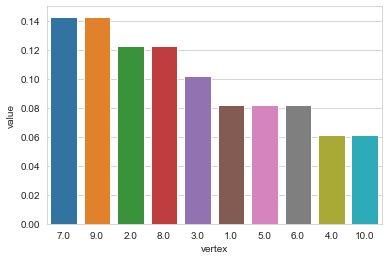

In [20]:
sns.set_style('whitegrid')

# Generate Random Matrix with (0, 1) : 
X = np.random.randint(low=0, high=2, size=(10, 10))

imp = [sum(X[i, :]) for i in range(X.shape[0])]
imp = imp/sum(imp)

Y = pd.DataFrame({'vertex' : [str(x) for x in np.linspace(1, 10, 10)], 'value' : imp})
Y = Y.sort_values('value', ascending=False)
sns.barplot(x='vertex', y='value', data=Y, order=Y['vertex'])
plt.show()

### Betweenness Centrality

**Does not care about the number of edges any one node or set of noedes has.** Betweenness centrality looks at all the shortest pahts that pass through a particular node. Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network. If you’re the only thing connecting two clusters, every communication between those clusters has to pass through you. In contrast to a hub, this sort of node is often referred to as a **broker**. It’s a quick way of giving you a sense of which nodes are important not because they have lots of connections themselves but because they stand between groups, giving the network connectivity and cohesion.

In [21]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

## Eigenvector Centrality

Eigenvector centrality **cares if you are a hub, but it also cares how many hubs you are connected to.** It’s calculated as a value from 0 to 1: **the closer to one, the greater the centrality.** Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. If you know a lot of well-connected people, you could spread a message very efficiently. If you’ve used Google, then you’re already somewhat familiar with Eigenvector centrality. Their PageRank algorithm uses an extension of this formula to decide which webpages get to the top of its search results.

In [22]:
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [23]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('William Penn', 0.23999456006192205)
('George Fox', 0.23683257726065216)
('George Whitehead', 0.12632024847366005)
('Margaret Fell', 0.12106792237170329)
('James Nayler', 0.10446026280446098)
('Benjamin Furly', 0.06419626175167242)
('Thomas Ellwood', 0.046190623885104545)
('George Keith', 0.045006564009171565)
('John Audland', 0.04164936340077581)
('Alexander Parker', 0.03893676140525336)
('John Story', 0.028990098622866983)
('John Burnyeat', 0.028974117533439564)
('John Perrot', 0.02829566854990583)
('James Logan', 0.026944806605823553)
('Richard Claridge', 0.026944806605823553)
('Robert Barclay', 0.026944806605823553)
('Elizabeth Leavens', 0.026944806605823553)
('Thomas Curtis', 0.026729751729751724)
('John Stubbs', 0.024316593960227152)
('Mary Penington', 0.02420824624214454)


In [24]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: William Penn | Betweenness Centrality: 0.23999456006192205 | Degree: 18
Name: George Fox | Betweenness Centrality: 0.23683257726065216 | Degree: 22
Name: George Whitehead | Betweenness Centrality: 0.12632024847366005 | Degree: 13
Name: Margaret Fell | Betweenness Centrality: 0.12106792237170329 | Degree: 13
Name: James Nayler | Betweenness Centrality: 0.10446026280446098 | Degree: 16
Name: Benjamin Furly | Betweenness Centrality: 0.06419626175167242 | Degree: 10
Name: Thomas Ellwood | Betweenness Centrality: 0.046190623885104545 | Degree: 8
Name: George Keith | Betweenness Centrality: 0.045006564009171565 | Degree: 8
Name: John Audland | Betweenness Centrality: 0.04164936340077581 | Degree: 6
Name: Alexander Parker | Betweenness Centrality: 0.03893676140525336 | Degree: 6
Name: John Story | Betweenness Centrality: 0.028990098622866983 | Degree: 6
Name: John Burnyeat | Betweenness Centrality: 0.028974117533439564 | Degree: 4
Name: John Perrot | Betweenness Centrality: 0.0282956685

## Advanced NetworkX：Community detection with modularity

NetworkX Community Detection：https://networkx.org/documentation/stable/reference/algorithms/community.html

Another common thing to ask about a network dataset is what the subgroups or communities are within the larger **social structure**. The field of **community detection** in networks is designed to answer these questions. **Modularity** is a measure of relative density in your network: a community (called a module or modularity class) has high density relative to other nodes within its module but low density with those outside. **Modularity gives you an overall score of how fractious your network is**, and that score can be used to partition the network and return the individual communities.

In [25]:
communities = community.greedy_modularity_communities(G)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

In [26]:
# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: James Nayler | Eigenvector Centrality: 0.3352974100447867
Name: Margaret Fell | Eigenvector Centrality: 0.253170949905681
Name: Francis Howgill | Eigenvector Centrality: 0.1909539378268105
Name: Richard Farnworth | Eigenvector Centrality: 0.15368535029296415
Name: Anthony Pearson | Eigenvector Centrality: 0.11120476725256784


In [27]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['William Gibson', 'Francis Howgill', 'James Nayler', 'William Tomlinson', 'Elizabeth Leavens', 'Martha Simmonds', 'Dorcas Erbery', 'Anthony Pearson', 'Thomas Lower', 'Hannah Stranger', 'Robert Rich', 'Thomas Holme', 'Thomas Aldam', 'Gervase Benson', 'George Fox the younger', 'Margaret Fell', 'Richard Farnworth']
Class 1: ['Joseph Besse', 'Samuel Bownas', 'John Bartram', 'David Lloyd', 'Isaac Norris', 'Anne Conway Viscountess Conway and Killultagh', 'Isabel Yeamans', 'James Logan', 'Jane Sowle', 'Thomas Story', 'William Bradford', 'Richard Claridge', 'Peter Collinson', 'George Keith', 'Tace Sowle', 'Edward Haistwell', 'William Penn']
Class 2: ['Thomas Salthouse', 'Mary Fisher', 'Leonard Fell', 'Ellis Hookes', 'Elizabeth Hooten', 'Mary Prince', 'William Coddington', 'William Crouch', 'John Crook', 'William Mucklow', 'William Mead', 'George Fox', 'William Dewsbury', 'John Perrot', 'Edward Burrough']
Class 3: ['Henry Pickworth', 'Francis Bugg', 'Silvanus Bevan', 'John Whitehead',

## Network Graph Visualization

### Graph visulization - NetworkX

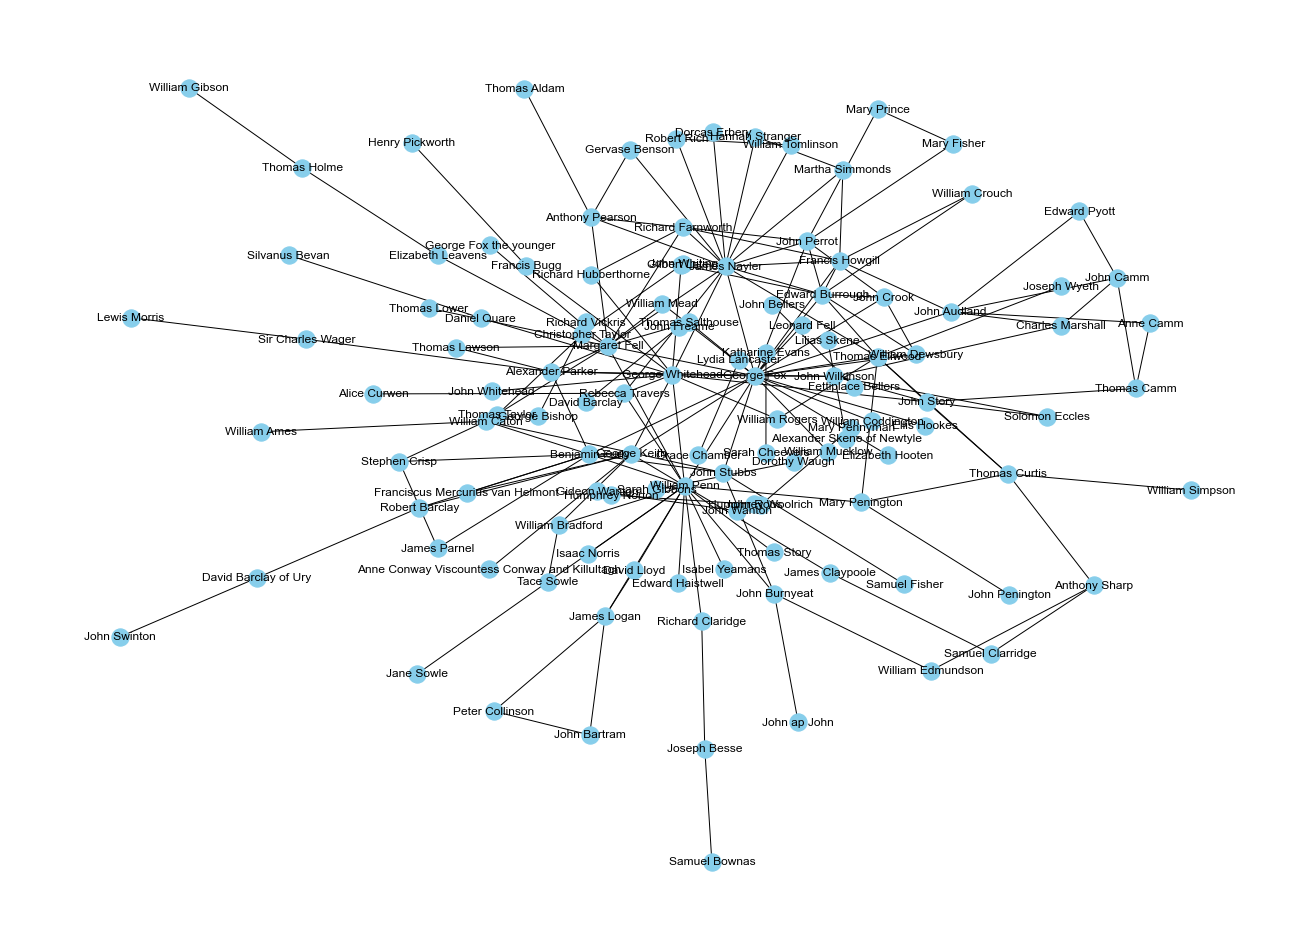

In [28]:
plt.figure(figsize = (18, 13))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'skyblue', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

### Graph visualization - Pyvis

In [34]:
from pyvis.network import Network

net = Network(notebook = True, width = '1000px', height = '700px', bgcolor = '#222222', font_color = 'white')
node_degree = dict(G.degree)

nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show('nx.html')

### Community detection - Louvain

In [36]:
communities =community_louvain.best_partition(G)

In [38]:
communities

{'Joseph Wyeth': 0,
 'Alexander Skene of Newtyle': 1,
 'James Logan': 11,
 'Dorcas Erbery': 3,
 'Lilias Skene': 1,
 'William Mucklow': 4,
 'Thomas Salthouse': 5,
 'William Dewsbury': 4,
 'John Audland': 6,
 'Richard Claridge': 11,
 'William Bradford': 11,
 'Fettiplace Bellers': 7,
 'John Bellers': 7,
 'Isabel Yeamans': 11,
 'George Fox the younger': 5,
 'George Fox': 4,
 'John Stubbs': 8,
 'Anne Camm': 6,
 'John Camm': 6,
 'Thomas Camm': 6,
 'Katharine Evans': 9,
 'Lydia Lancaster': 10,
 'Samuel Clarridge': 11,
 'Thomas Lower': 5,
 'Gervase Benson': 3,
 'Stephen Crisp': 8,
 'James Claypoole': 11,
 'Thomas Holme': 5,
 'John Freame': 12,
 'John Swinton': 8,
 'William Mead': 5,
 'Henry Pickworth': 13,
 'John Crook': 4,
 'Gilbert Latey': 13,
 'Ellis Hookes': 4,
 'Joseph Besse': 11,
 'James Nayler': 3,
 'Elizabeth Hooten': 4,
 'George Whitehead': 13,
 'John Whitehead': 13,
 'William Crouch': 3,
 'Benjamin Furly': 8,
 'Silvanus Bevan': 13,
 'Robert Rich': 3,
 'John Whiting': 14,
 'Christophe

In [39]:
nx.set_node_attributes(G, communities, 'group')

In [40]:
com_net = Network(notebook = True, width = '1000x', height = '700px', bgcolor = '#222222', font_color = 'white')
com_net.from_nx(G)
com_net.show('nxlouvain.html')

## Exporting Data

In [30]:
#nx.write_gexf(G, 'quaker_network.gexf')